In [ ]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load your dataset
# df = pd.read_csv('path_to_your_csv_file.csv')

# For demonstration, I'll create a mock-up based on your provided column names.
# You should replace this with the actual data loading line.
df = pd.read_csv('result.csv')  # Replace with your actual DataFrame loading line

# Separate the features and the target
df.drop(columns = ['Unnamed: 0'],axis=1,inplace=True)
X = df.drop(['subject_id', 'hospital_expire_flag','visit'], axis=1)  # Drop non-feature and target column
y = df['hospital_expire_flag']

# Identify categorical columns (replace 'column_name' with the actual name of your categorical columns)
categorical_cols = ['diagnosis']  # Add your actual categorical column names

# Numerical columns (replace with actual numerical column names)
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Create a preprocessing and modeling pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(df.columns, df.info(), df.dtypes)
object_columns = df.select_dtypes(include=['object']).columns
print(object_columns)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'ROC AUC: {roc_auc}')

from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)
print(class_report)

pickle.dump(model, open('model.pkl','wb'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Columns: 275 entries, subject_id to patientweight
dtypes: float64(86), int64(188), object(1)
memory usage: 141.9+ KB
Index(['subject_id', 'visit', '225152_x', '220949_x', '222168_x', '225943_x',
       '226361_x', '225158_x', '226453_x', '225909_x',
       ...
       '227526_y', '221036_y', '225934_y', '225888_y', '227535_y', '225941_y',
       '225973_y', 'diagnosis', 'hospital_expire_flag', 'patientweight'],
      dtype='object', length=275) None subject_id                int64
visit                     int64
225152_x                  int64
220949_x                  int64
222168_x                  int64
                         ...   
225941_y                float64
225973_y                float64
diagnosis                object
hospital_expire_flag      int64
patientweight           float64
Length: 275, dtype: object
Index(['diagnosis'], dtype='object')
Accuracy: 0.7857142857142857
ROC AUC: 0.6212121212121211
    

In [ ]:
y_test.shape

(14,)

In [ ]:
X_test.loc[62].values

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0.0, 154.6853216, 4535.1527717, 453.51526048, 2000,
       2970.0741196799995, 0, 0, 0, 0, 0.0, 0, 0.0, 0.0, 2.0000001, 0.0,
       0.0, 49.999999, 1.0, 0, 0, 0, 0, 0, 0.0, 0.0, 0, 0.0, 0.0, 1,
       0.33333334, 0.0, 0.0, 0, 2.0000001, 19.88372097, 0.0, 0.0, 0.0,
       0.0, 0.0, 0, 0, 0, 0, 29.1372759, 0, 0.0, 0.0, 3.1634790498, 0,
       0.0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0,
       0, 0.0, 0, 13.879999653, 0.0, 0, 0, 0, 0, 0, 0.0, 0.0, 

In [ ]:
X.columns

Index(['225152_x', '220949_x', '222168_x', '225943_x', '226361_x', '225158_x',
       '226453_x', '225909_x', '225799_x', '225879_x',
       ...
       '227529_y', '227526_y', '221036_y', '225934_y', '225888_y', '227535_y',
       '225941_y', '225973_y', 'diagnosis', 'patientweight'],
      dtype='object', length=272)

In [ ]:
val = X_test.loc[62].values[:-2]
cols = X.columns
final = []
for i in range(len(val)):
  if val[i] > 0.0:
      if 'y' in cols[i]:
        final.append([cols[i],val[i]])

In [ ]:
final

[['220949_y', 154.6853216],
 ['222168_y', 4535.1527717],
 ['225943_y', 453.51526048],
 ['226361_y', 2000],
 ['225158_y', 2970.0741196799995],
 ['222011_y', 2.0000001],
 ['221744_y', 49.999999],
 ['221668_y', 1.0],
 ['225884_y', 1],
 ['225154_y', 0.33333334],
 ['221456_y', 2.0000001],
 ['221749_y', 19.88372097],
 ['221662_y', 29.1372759],
 ['221906_y', 3.1634790498],
 ['222315_y', 13.879999653],
 ['221653_y', 36.14118797]]

In [ ]:
Dextrose 5% = 154.6853216
Propofol = 4535.1527717
Solution = 453.51526048
Pre-Admission Intake = 2000
NaCl 0.9% = 2970.0741196799995
Magnesium Sulfate = 2.0000001
Fentanyl = 49.999999
Midazolam (Versed) = 1.0
Metronidazole = 1
Morphine Sulfate = 0.33333334
Calcium Gluconate = 2.0000001
Phenylephrine = 19.88372097
Dopamine = 29.1372759
Norepinephrine = 3.1634790498
Vasopressin = 13.879999653
Dobutamine = 36.14118797
weight = 77.4
'ALTERED MENTAL STATUS'

SyntaxError: ignored

In [ ]:
df = pd.read_csv('result.csv')
df['diagnosis'].unique()

array(['SHORTNESS OF BREATH', 'PNEUMONIA', 'ACUTE CHOLANGITIS',
       'FEVER;URINARY TRACT INFECTION',
       'SYNCOPE;TELEMETRY;INTRACRANIAL HEMORRHAGE', 'LEFT HIP OA/SDA',
       'MEDIASTINAL ADENOPATHY', 'FACIAL NUMBNESS',
       'AROMEGLEY;BURKITTS LYMPHOMA', 'STEMI;',
       'TRACHEAL ESOPHAGEAL FISTULA', 'SEPSIS', 'CHOLECYSTITIS',
       'CELLULITIS', 'ABDOMINAL PAIN', 'ASTHMA;CHRONIC OBST PULM DISEASE',
       'ELEVATED LIVER FUNCTIONS;S/P LIVER TRANSPLANT',
       'HYPOTENSION;UNRESPONSIVE', 'FEVER',
       'URINARY TRACT INFECTION;PYELONEPHRITIS', 'S/P FALL',
       'TRACHEAL STENOSIS', 'INFERIOR MYOCARDIAL INFARCTION\\CATH',
       'FAILURE TO THRIVE', 'HEPATIC ENCEP', 'CHEST PAIN',
       'RENAL CANCER/SDA', 'UPPER GI BLEED',
       'PNEUMONIA/HYPOGLCEMIA/SYNCOPE', 'ASTHMA/COPD FLARE', 'VOLVULUS',
       'SEIZURE;STATUS EPILEPTICUS', 'HYPOGLYCEMIA',
       'CEREBROVASCULAR ACCIDENT', 'HYPOTENSION',
       'METASTIC MELANOMA;ANEMIA', 'HYPOTENSION, RENAL FAILURE',
       'ACU

In [ ]:
del model

In [ ]:
loaded_model = pickle.load(open('model.pkl', 'rb'))


In [ ]:
loaded_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['225152_x', '220949_x',
                                                   '222168_x', '225943_x',
                                                   '226361_x', '225158_x',
                                                   '226453_x', '225909_x',
                                                   '225799_x', '225879_x',
                                                   '221824_x', '226452_x',
                                                   '225823_x', '226089_x',
                                                   '222011_x', '225166_x',
                                                   '225834_x', '221744_x',
                                                   '221668_x', '225975_x',
                                                   '225798_x', '225855_x',
                                                   '225845_x', '225860_x',
                                                   '225910_x', '225944_x',
                                                   '225893_x', '227523_x',
                                                   '225168_x', '225884_x', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['diagnosis'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
loaded_model.predict(X_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
df = pd.read_csv('result.csv')
df.drop(columns = ['Unnamed: 0','subject_id'],axis=1,inplace=True)

In [ ]:
X.columns

Index(['225152_x', '220949_x', '222168_x', '225943_x', '226361_x', '225158_x',
       '226453_x', '225909_x', '225799_x', '225879_x',
       ...
       '227529_y', '227526_y', '221036_y', '225934_y', '225888_y', '227535_y',
       '225941_y', '225973_y', 'diagnosis', 'patientweight'],
      dtype='object', length=272)

In [ ]:
from flask import Flask, request, jsonify
import pandas as pd
import pickle

# Load the model
model = pickle.load(open('model.pkl', 'rb'))

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get data from POST request
        data = request.get_json()

        # Convert data into DataFrame
        features = pd.DataFrame(data, index=[0])

        # Make prediction
        prediction = model.predict(features)

        # Return results
        return jsonify({'prediction': int(prediction[0])})

    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create confusion matrix
conf_matrix = confusion_matrix(hospital_expire_flag, y_pred)

# Plot the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

NameError: ignored

In [ ]:
df

,visit,225152_x,220949_x,222168_x,225943_x,226361_x,225158_x,226453_x,225909_x,225799_x,...,227526_y,221036_y,225934_y,225888_y,227535_y,225941_y,225973_y,diagnosis,hospital_expire_flag,patientweight
0,1,1,1,1,1,1,1,1,1,1,...,0.000000,0.000000,0.00000,0,0.0,0.000000,0.0,SHORTNESS OF BREATH,0,41.5
1,2,0,1,0,1,0,1,0,0,1,...,0.000000,0.000000,0.00000,0,0.0,0.000000,0.0,PNEUMONIA,0,41.5
2,1,0,1,0,0,1,1,0,0,0,...,0.000000,0.000000,0.00000,0,0.0,0.000000,0.0,ACUTE CHOLANGITIS,1,65.0
3,1,0,1,0,0,0,1,0,0,0,...,0.000000,0.000000,0.00000,0,0.0,0.000000,0.0,FEVER;URINARY TRACT INFECTION,0,51.9
4,1,0,1,0,0,0,0,0,0,0,...,0.000000,0.000000,0.00000,0,0.0,0.000000,0.0,SYNCOPE;TELEMETRY;INTRACRANIAL HEMORRHAGE,0,63.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,3,0,1,0,0,0,1,0,0,0,...,0.000000,0.000000,0.00000,0,0.0,0.000000,0.0,PERICARDIAL EFFUSION,0,105.0
62,1,0,1,1,1,1,1,0,0,0,...,0.000000,0.000000,0.00000,0,0.0,0.000000,0.0,ALTERED MENTAL STATUS,1,77.4
63,1,0,1,1,1,0,1,1,1,1,...,21884.074029,833.516585,5632.93474,7,5.0,0.000000,0.0,ACUTE RESPIRATORY DISTRESS SYNDROME;ACUTE RENA...,0,87.0
64,1,0,0,0,0,1,0,0,0,0,...,0.000000,0.000000,0.00000,0,0.0,0.000000,0.0,BRADYCARDIA,0,106.0


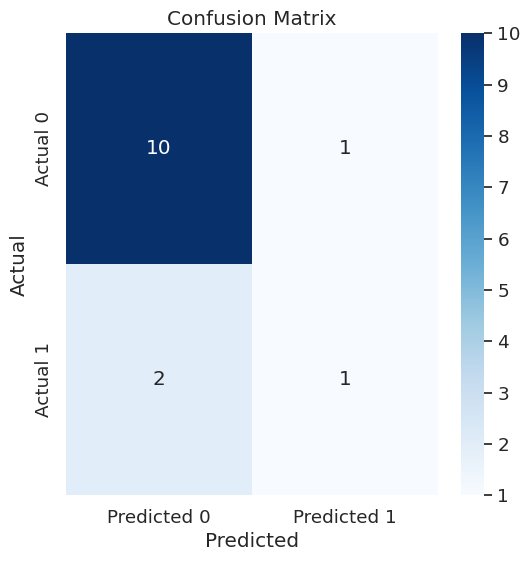

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming hospital_expire_flag and y_pred are columns in your DataFrame df
true_labels = y_test
predicted_labels = y_pred

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
